# Statistical Analysis II - Practicum 1

## Non-parametric statistics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

### Kolmogorov-Smirnov test

Examples from [the Scipy website](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)

The one-sample test compares the underlying distribution F(x) of a sample against a given distribution G(x) (e.g. normal, uniform). 

The two-sample test compares the underlying distributions of two independent samples. 

Both tests are **valid only** for continuous distributions and measure the maximum distance between distributions.

In [5]:
# Import random seed
rng = np.random.default_rng() #seed = 42

#Produce a distribution
F_x = stats.uniform.rvs(size=100, random_state=rng)
print(F_x)

#Compare it against a standard distribution
G_x = stats.norm.cdf

stats.kstest(F_x,G_x)

[0.68899409 0.79638796 0.61305991 0.20303818 0.82471249 0.53582786
 0.97001199 0.74830142 0.01670605 0.85621549 0.36656035 0.92218572
 0.15283013 0.16258752 0.98737646 0.38386058 0.86981575 0.70306195
 0.54231575 0.95595166 0.37908998 0.51279038 0.3167167  0.66010005
 0.26184497 0.21122793 0.59712955 0.49458825 0.74732051 0.2778571
 0.96201672 0.8026042  0.14440993 0.03688448 0.42588731 0.12309248
 0.26700989 0.06397241 0.49270661 0.90860964 0.88218025 0.59450365
 0.1610829  0.19218864 0.24329546 0.27533493 0.64754942 0.09576236
 0.74474105 0.69501656 0.52200106 0.13950973 0.05907255 0.43254432
 0.02957394 0.73625224 0.66860313 0.88103355 0.42723464 0.81207329
 0.25304213 0.20570393 0.52826086 0.29841202 0.55259433 0.9000056
 0.38692642 0.34380615 0.1533948  0.23546124 0.46637019 0.13711162
 0.72168344 0.44293908 0.46850198 0.46262787 0.82330148 0.77214236
 0.30081463 0.35462201 0.05089141 0.82650979 0.08478576 0.11304174
 0.59420537 0.34238031 0.17841737 0.56326822 0.82529145 0.076249

KstestResult(statistic=0.5066644377176251, pvalue=2.6146519175431926e-24)

#### Question: What would have happened if the sample distribution was larger?

In [9]:
#Produce a distribution
F1_x = stats.uniform.rvs(size=10, random_state=rng)
print(F1_x)

stats.kstest(F1_x,G_x)

[0.04547096 0.67767065 0.76259008 0.14784799 0.90075946 0.36022171
 0.10913398 0.21437363 0.24379288 0.69175737]


KstestResult(statistic=0.5181340397904166, pvalue=0.005071778723734605)

Let's look into another example

In [12]:
F2_x = stats.norm.rvs(size=1000, random_state=rng)
print(F2_x)
stats.kstest(F2_x, G_x)

[ 1.74647418e+00 -8.50462927e-01  5.12442929e-01  1.46026865e-01
 -5.38930456e-01  8.34215671e-01 -1.67075047e+00  6.24490531e-01
 -3.45562838e-01  1.30742761e+00 -2.89205268e-01 -2.14974551e+00
 -1.33728893e-01 -2.55340639e-01  5.00647367e-01 -2.64643369e-01
  1.23646488e+00 -1.15670987e+00 -2.58894480e-01 -1.06628810e+00
  3.72210961e-01 -1.57486553e+00  1.75364062e+00  2.55656422e-01
  1.99082618e-01 -2.26024095e+00 -5.59340644e-01 -8.58896305e-01
 -6.05638469e-01 -1.52361273e-01  1.44176952e+00  8.70723863e-01
 -1.24965127e-01  1.24369869e+00  6.87439283e-01 -1.89672503e+00
 -7.61166315e-01  5.60185569e-01 -2.52345420e-01 -1.67967734e+00
  7.61121114e-01  5.35329873e-01 -6.83084040e-01  2.62865404e-02
 -1.23325036e+00  4.52046406e-01 -2.94722222e-01 -1.09733384e+00
  6.62810783e-01  2.98020098e+00  4.47509071e-01  2.99026825e-01
 -1.56573965e+00 -1.59730180e-01  1.01601673e+00  2.32677489e-01
 -2.71292992e+00  4.68259922e-01  8.11418673e-01 -6.53532328e-01
 -8.49927849e-01 -6.30887

KstestResult(statistic=0.016672237419742705, pvalue=0.9394067705875417)

As expected, the p-value is not below our threshold of 0.05, so we cannot reject the null hypothesis.

Let us assume, however, that the random variates are distributed according to a normal distribution that is shifted toward greater values. 
In this case, the cumulative density function (CDF) of the underlying distribution tends to be less than the CDF of the standard normal. 

In [13]:
F3_x = stats.norm.rvs(size=100, loc=0.5, random_state=rng)
print(F3_x.mean())
stats.kstest(F3_x, G_x, alternative='less')

0.6050535179370344


KstestResult(statistic=0.264416061706937, pvalue=5.821494329060942e-07)

#### What would have happened if I had used another alternative condition?

Two-sample tests can also be performed.

In [17]:
F4_x = stats.laplace.rvs(size=1005, random_state=rng)
F5_x = stats.laplace.rvs(size=995, random_state=rng)

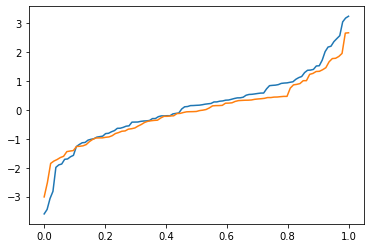

In [15]:
plt.plot(np.linspace(0,1,105),np.sort(F4_x))
plt.plot(np.linspace(0,1,95),np.sort(F5_x))
plt.show()

In [18]:
stats.kstest(F4_x, F5_x)

KstestResult(statistic=0.03730093252331308, pvalue=0.47354030447689266)